# Chapter 5: Support Vector Machines

## Exercises

### 1) What is the fundamental idea behind support vector machines?

The fundamental idea of support vector machines is to create the larger "street" between two or more classes. In other words, the goal is to have the maximum margin as possible between the decision boundary and the two classes.
<p> In SVM there is 2 types of classification: hard margin classifier and soft margin classifier
<br> * The soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street).
<br> * The hard margin it will not compromise, being very subjective to outliers. 
<br> If the dataset is not linear, SVM allows allow the implementation of Kernels to solve the non linearity. 

### 2) What is a support vector?

A support vector is the any instance between the street. The decisions boundaries are determined only by the support vectors. Removing or moving the remaining samples will not influence the decisions boundary.   

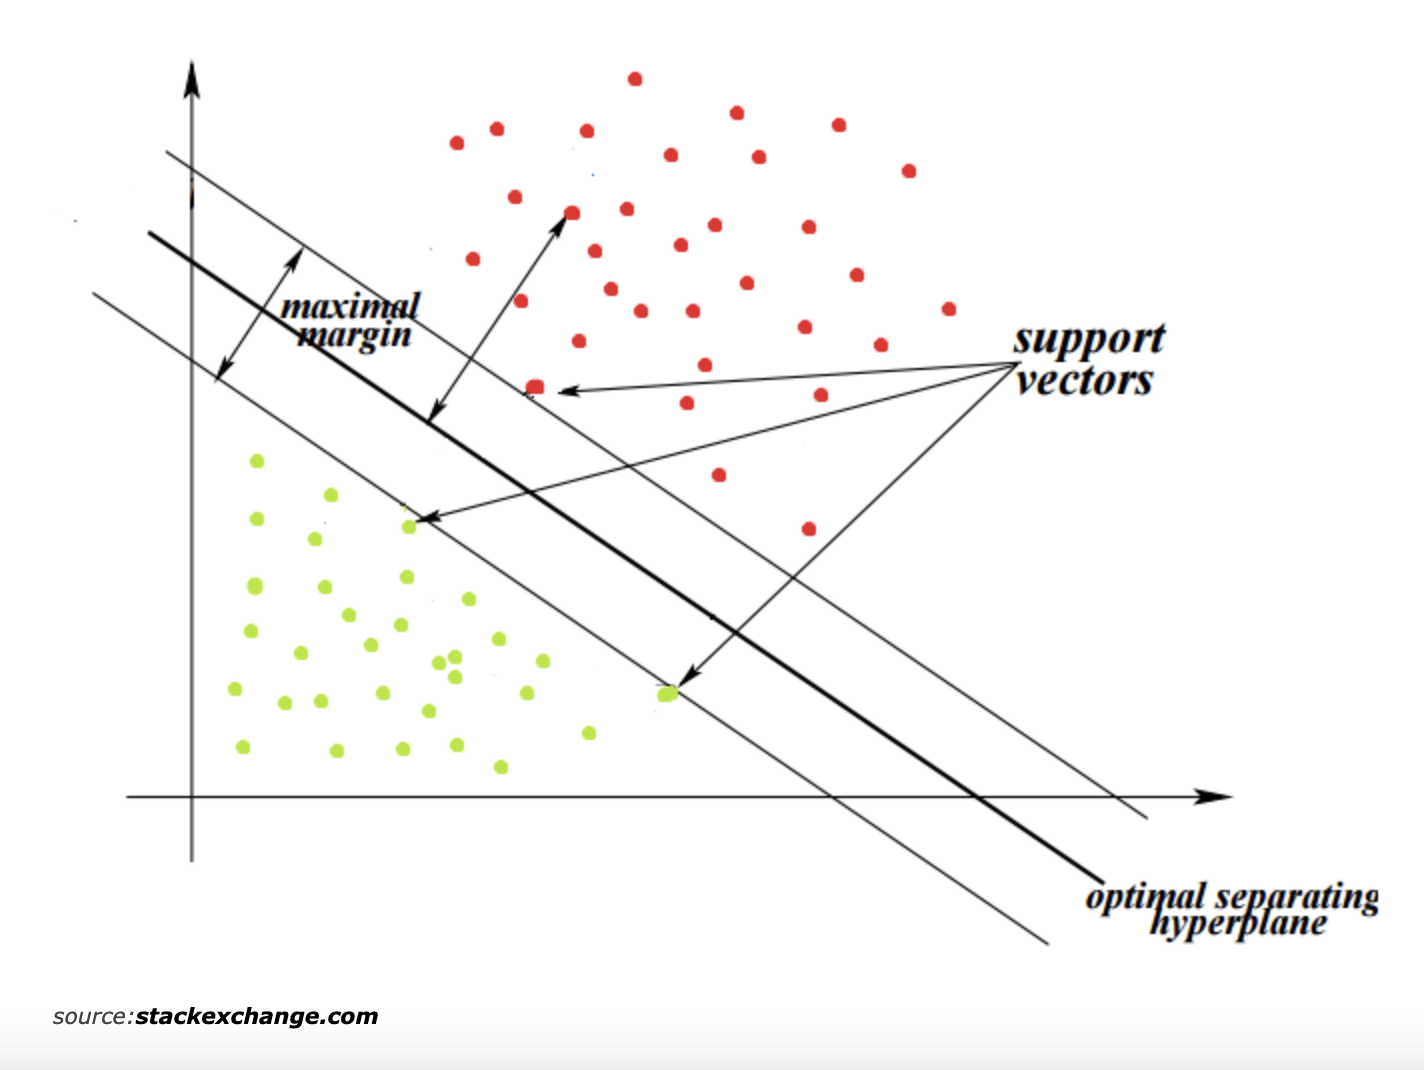 

### 3) Why is it important to scale the features when using SVM?

SVM are susceptible to non scaled data, because the goal is to fit the largest margin as possible. When working with non scaled data, the features width largest value we'll have a bigger impact than the smaller ones.

### 4) Can an SVM classifier output a confidence score when it classifies an instance? What about a probability ?

SVM can output a score, which is the the distance of a certain instance to the decision boundary. However, SVM cannot output a probability directly. In order to transform the score in probability, at the end of the training it calculated using a 5-fold cross validation to  generate out-of-sample scores for the training samples, and it will train a LogisticRegression model to map these scores to estimated probabilities

### 5) How can you choose between LinearSVC, SVC, and SGDClassifier?

LinearSVC is the fastest for linear classifications, since it implements a optimized algorithm for linear models.
<br> SGDClassifer would be used for datasets very large that don't feet in memory. However, these 2 classes don't support the kernel trick. It is only supported by SVC, but it is the slowest.

### 6) Say you are training a SVM classifier with an RBF kernel, but it seem to underfit the training set. Should you increase or decrease  the gamma? What about C?

If the SVM is under fitting we can increase C and gamma, reducing the regularization

### 7) What does it mean for a model to be e-sensitive?

A Regression SVM model tries to fit as many instances within a small margin around its predictions. If you add instances within this margin, the model will not be affected at all: it is said to be ϵ-insensitive.

### 8) What is the point of using the kernel trick?

The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result without having to transform the inputs at all.

### 9) Train a LinearSVC on a linearly separable dataset. Then train an svc and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [2]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

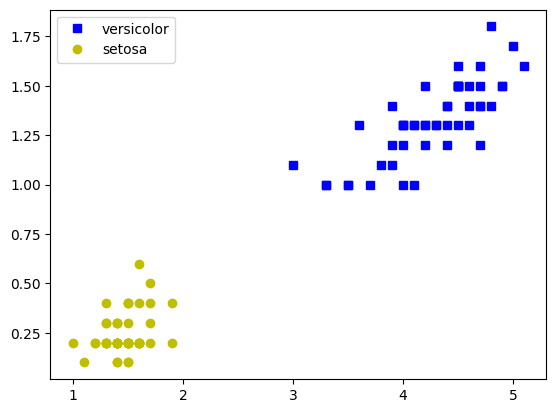

In [3]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="versicolor") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="setosa") # label="Iris setosa"
plt.legend()
plt.show()

In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Scale the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Model Hyperparameter
C = 5
ALPHA = 0.05 # learning rate

# Create the Models
linear_clf = LinearSVC(loss="hinge", C=5, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C, random_state=42).fit(X_scaled, y)
sgd_clf = SGDClassifier(loss="hinge", alpha=ALPHA).fit(X_scaled, y)

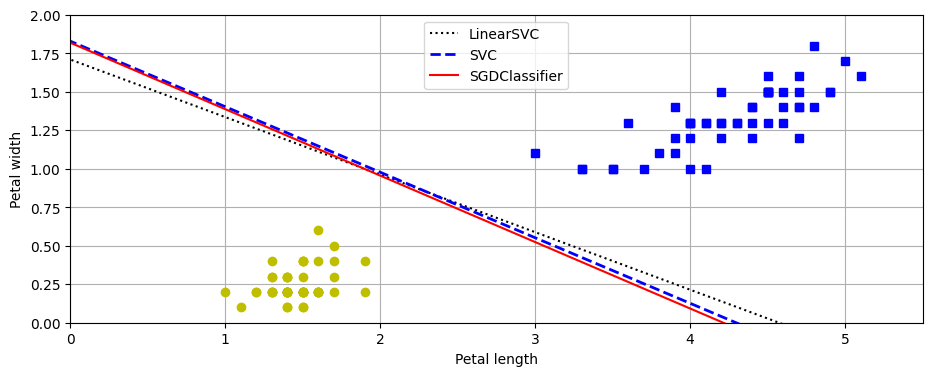

In [30]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scalar.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(linear_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

### 10)Train an SVM classifier on the Wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?

In [43]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine(as_frame=True)

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [49]:
# Check for NaN values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 2 to 102
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       133 non-null    float64
 1   malic_acid                    133 non-null    float64
 2   ash                           133 non-null    float64
 3   alcalinity_of_ash             133 non-null    float64
 4   magnesium                     133 non-null    float64
 5   total_phenols                 133 non-null    float64
 6   flavanoids                    133 non-null    float64
 7   nonflavanoid_phenols          133 non-null    float64
 8   proanthocyanins               133 non-null    float64
 9   color_intensity               133 non-null    float64
 10  hue                           133 non-null    float64
 11  od280/od315_of_diluted_wines  133 non-null    float64
 12  proline                       133 non-null    float64
dtypes: float64

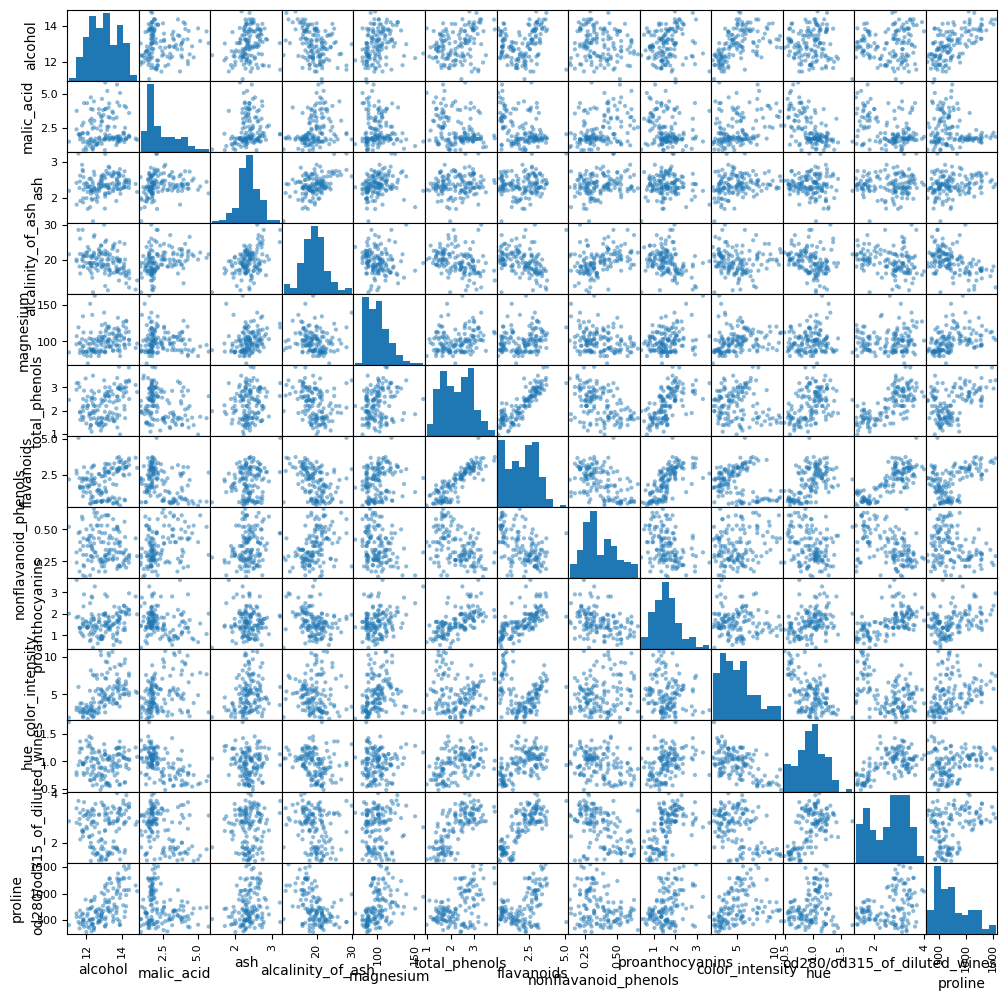

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train, figsize=(12, 12))
plt.show()

In [58]:
y_train.value_counts()

target
1    53
0    44
2    36
Name: count, dtype: int64

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.svm import LinearSVC

# Create Pipeline
lin_cfl = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=42)
                        )

# Create Parameters
param_distrib = {"linearsvc__C": uniform(1, 10)  }

# Create random search
lin_search = RandomizedSearchCV(lin_cfl, param_distributions=param_distrib, 
                                cv=5, random_state=42, n_jobs=-1, n_iter=100)
lin_search.fit(X_train, y_train)
print(lin_search.best_score_)
print(lin_search.best_estimator_)

0.9849002849002849
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1.2058449429580245, random_state=42))])


In [72]:
lin_search.score(X_test, y_test)

0.9777777777777777

Let's try SVC with some hyperparameters and compare

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

# Create the pipeline 
svc_clf = make_pipeline(StandardScaler(), SVC(random_state=42))

# Create hyperparameter distribution
param_distrib = {"svc__gamma": loguniform(0.001, 0.1),
                "svc__C": uniform(1, 10)
                }

# Create random search
svg_search = RandomizedSearchCV(svc_clf, param_distributions=param_distrib, 
                                cv=5, random_state=42, n_jobs=-1, n_iter=100)
svg_search.fit(X_train, y_train)
print(svg_search.best_score_)
print(svg_search.best_estimator_)

0.9925925925925926
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901176,
                     random_state=42))])


In [73]:
svg_search.score(X_test, y_test)

0.9777777777777777

### 11) Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2. The original dataset can be fetched using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use much less instances (e.g., 2,000), to test many more hyperparameter combinations. What is your best model's RMSE?

In [75]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Fetch the dataset
housing = fetch_california_housing(as_frame=True)

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.33, random_state=42)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13828 entries, 5088 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      13828 non-null  float64
 1   HouseAge    13828 non-null  float64
 2   AveRooms    13828 non-null  float64
 3   AveBedrms   13828 non-null  float64
 4   Population  13828 non-null  float64
 5   AveOccup    13828 non-null  float64
 6   Latitude    13828 non-null  float64
 7   Longitude   13828 non-null  float64
dtypes: float64(8)
memory usage: 972.3 KB


In this dataset we don´t have NaN values

In [78]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000
mean,3.876745,28.559662,5.436556,1.097533,1430.865924,3.128660,35.651238,-119.585098
std,1.903102,12.600767,2.449446,0.445688,1146.236335,12.646130,2.134064,2.005127
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000
25%,2.568575,18.000000,4.459802,1.006623,793.000000,2.432189,33.940000,-121.810000
50%,3.538750,29.000000,5.232422,1.049552,1170.500000,2.819702,34.270000,-118.510000
75%,4.756600,37.000000,6.058566,1.100283,1729.000000,3.282093,37.720000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000


In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR


# Create Pipeline
lin_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=5000, random_state=42))
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=5000, random_state=42))])

MSE:  0.6292523109894259
RMSE:  0.7932542536850502
R2:  0.5272426717659441


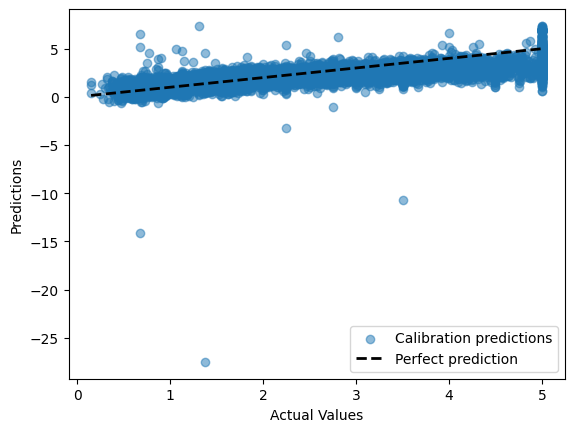

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


y_pred = lin_reg.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_train, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.legend(["Calibration predictions", "Perfect prediction"])
plt.show()

The regression is not as good as we want. Since the target is in hundreds of thousands of dollars, we have an error of 79.000 dollars. Let's try to improve with some hyperparameters tunning

In [90]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform


# Pipeline
svr_reg = make_pipeline(StandardScaler(), SVR())

# Params
param_distrib = {"svr__C": uniform(1, 10),
                 "svr__gamma": loguniform(0.001, 0.1)
                 }

# Random search
svr_search = RandomizedSearchCV(svr_reg, param_distrib, n_iter=100, cv=5, random_state=42,
                                n_jobs=-1)
svr_search.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002795A693550>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002795D15D600>},
                   random_state=42)

In [91]:
print("Best Score: ", svr_search.best_score_)
print("Best Estimator: ", svr_search.best_estimator_)

Best Score:  0.7169154459982301
Best Estimator:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485974))])


In [92]:
svr_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485974))])

MSE:  0.3282337531409245
RMSE:  0.572916881529009
R2:  0.7533979463227625


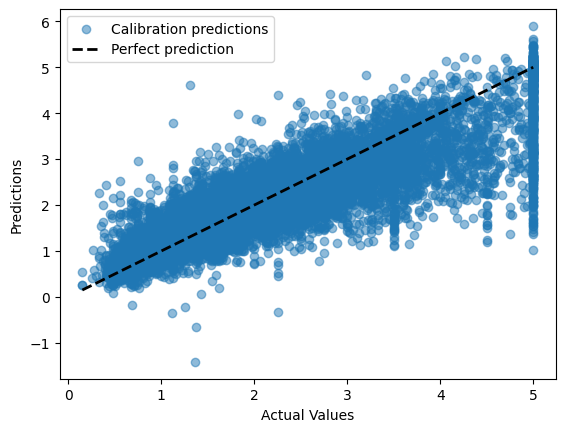

In [93]:
y_pred = svr_search.best_estimator_.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_train, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.legend(["Calibration predictions", "Perfect prediction"])
plt.show()

MSE:  0.3467281270204924
RMSE:  0.588836248052455
R2:  0.7398092025931677


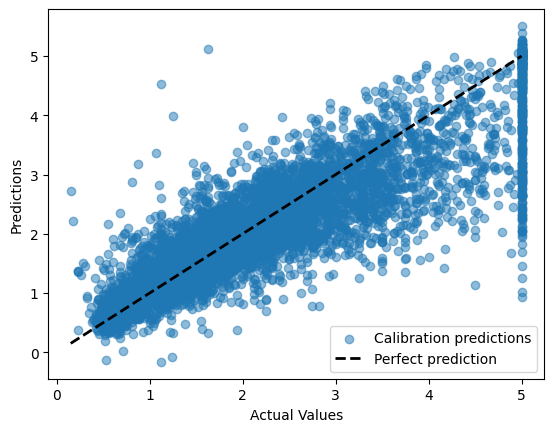

In [95]:
y_pred = svr_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.legend(["Calibration predictions", "Perfect prediction"])
plt.show()